In [25]:
import pandas as pd
import geopandas as gpd
import folium
from folium import plugins
import geodatasets
import matplotlib.pyplot as plt


In [5]:
crash_df = pd.read_csv('../Resources/Montgomery_Crash_Data.csv', index_col='Crash Date/Time', parse_dates=True)

In [6]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104002 entries, 2021-04-04 12:00:00 to 2020-02-09 13:17:00
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Report Number      104002 non-null  object 
 1   Weather            104002 non-null  object 
 2   Surface Condition  91090 non-null   object 
 3   Injury Severity    104002 non-null  object 
 4   Vehicle ID         104002 non-null  object 
 5   Vehicle Year       104002 non-null  int64  
 6   Vehicle Make       103754 non-null  object 
 7   Vehicle Model      103736 non-null  object 
 8   Latitude           104002 non-null  float64
 9   Longitude          104002 non-null  float64
 10  geometry           104002 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 9.5+ MB


In [7]:
crash_df.head()

,Report Number,Weather,Surface Condition,Injury Severity,Vehicle ID,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,geometry
Crash Date/Time,,,,,,,,,,,
2021-04-04 12:00:00,MCP26370040,CLEAR,DRY,NO APPARENT INJURY,88FCD6CE-A85A-4CBD-9BEC-3B6E6DCF16BB,2021,MITS,DELOCA,39.057201,-77.293102,POINT (-77.29310223 39.05720146)
2023-12-04 21:37:00,MCP3221002N,CLEAR,DRY,SUSPECTED MINOR INJURY,6E02796A-26BA-45CD-88B1-13EEDF7EC29C,2015,TOYOTA,RAV4,39.058683,-77.290703,POINT (-77.29070333 39.05868333)
2024-07-17 21:27:00,MCP9399002C,CLOUDY,WET,SUSPECTED MINOR INJURY,70D8BF87-2BB7-4092-9267-0AD9E7E42978,2004,JEEP,GRAND CHEROKEE,39.063110,-77.295795,POINT (-77.29579535 39.06310977)
2016-06-21 09:49:00,MCP28240026,RAIN,WET,NO APPARENT INJURY,334BEA8D-C367-4DFB-8A70-93750F1BCFBC,2008,HOND,4S,39.063192,-77.296605,POINT (-77.296605 39.06319167)
2016-12-05 06:55:00,MCP2497000L,RAIN,WET,SUSPECTED MINOR INJURY,B8B60239-5172-4024-846A-0EAFD3A7E0B2,2004,VOLVO,S60,39.063220,-77.295740,POINT (-77.29574 39.06322)


In [8]:
montgomery_gdf = gpd.GeoDataFrame(crash_df, geometry=gpd.points_from_xy(crash_df.Longitude, crash_df.Latitude), crs='EPSG:4326')


In [10]:
#time of day accident tend to happen the most?

In [20]:
county_gdf = gpd.read_file('../Resources/Montgomery_County.json')
county_gdf.head()

,FID,County,State,Country,FIPS,Combined,12_31_22,Pct_Total,geometry
0,0,Montgomery,Maryland,US,24031,"Montgomery, Maryland, US",131345,21.9854,"POLYGON ((-77.00249 38.96595, -77.00241 38.966..."


<Axes: >

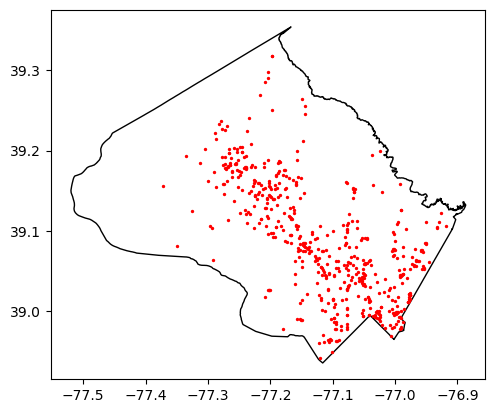

In [12]:
base = county_gdf.plot(color='white', edgecolor='black')
montgomery_gdf.loc['2021-01'].plot(ax=base, marker='o', color='red', markersize=2)

In [18]:
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))


Text(0.5, 1.0, 'Volcanoes')

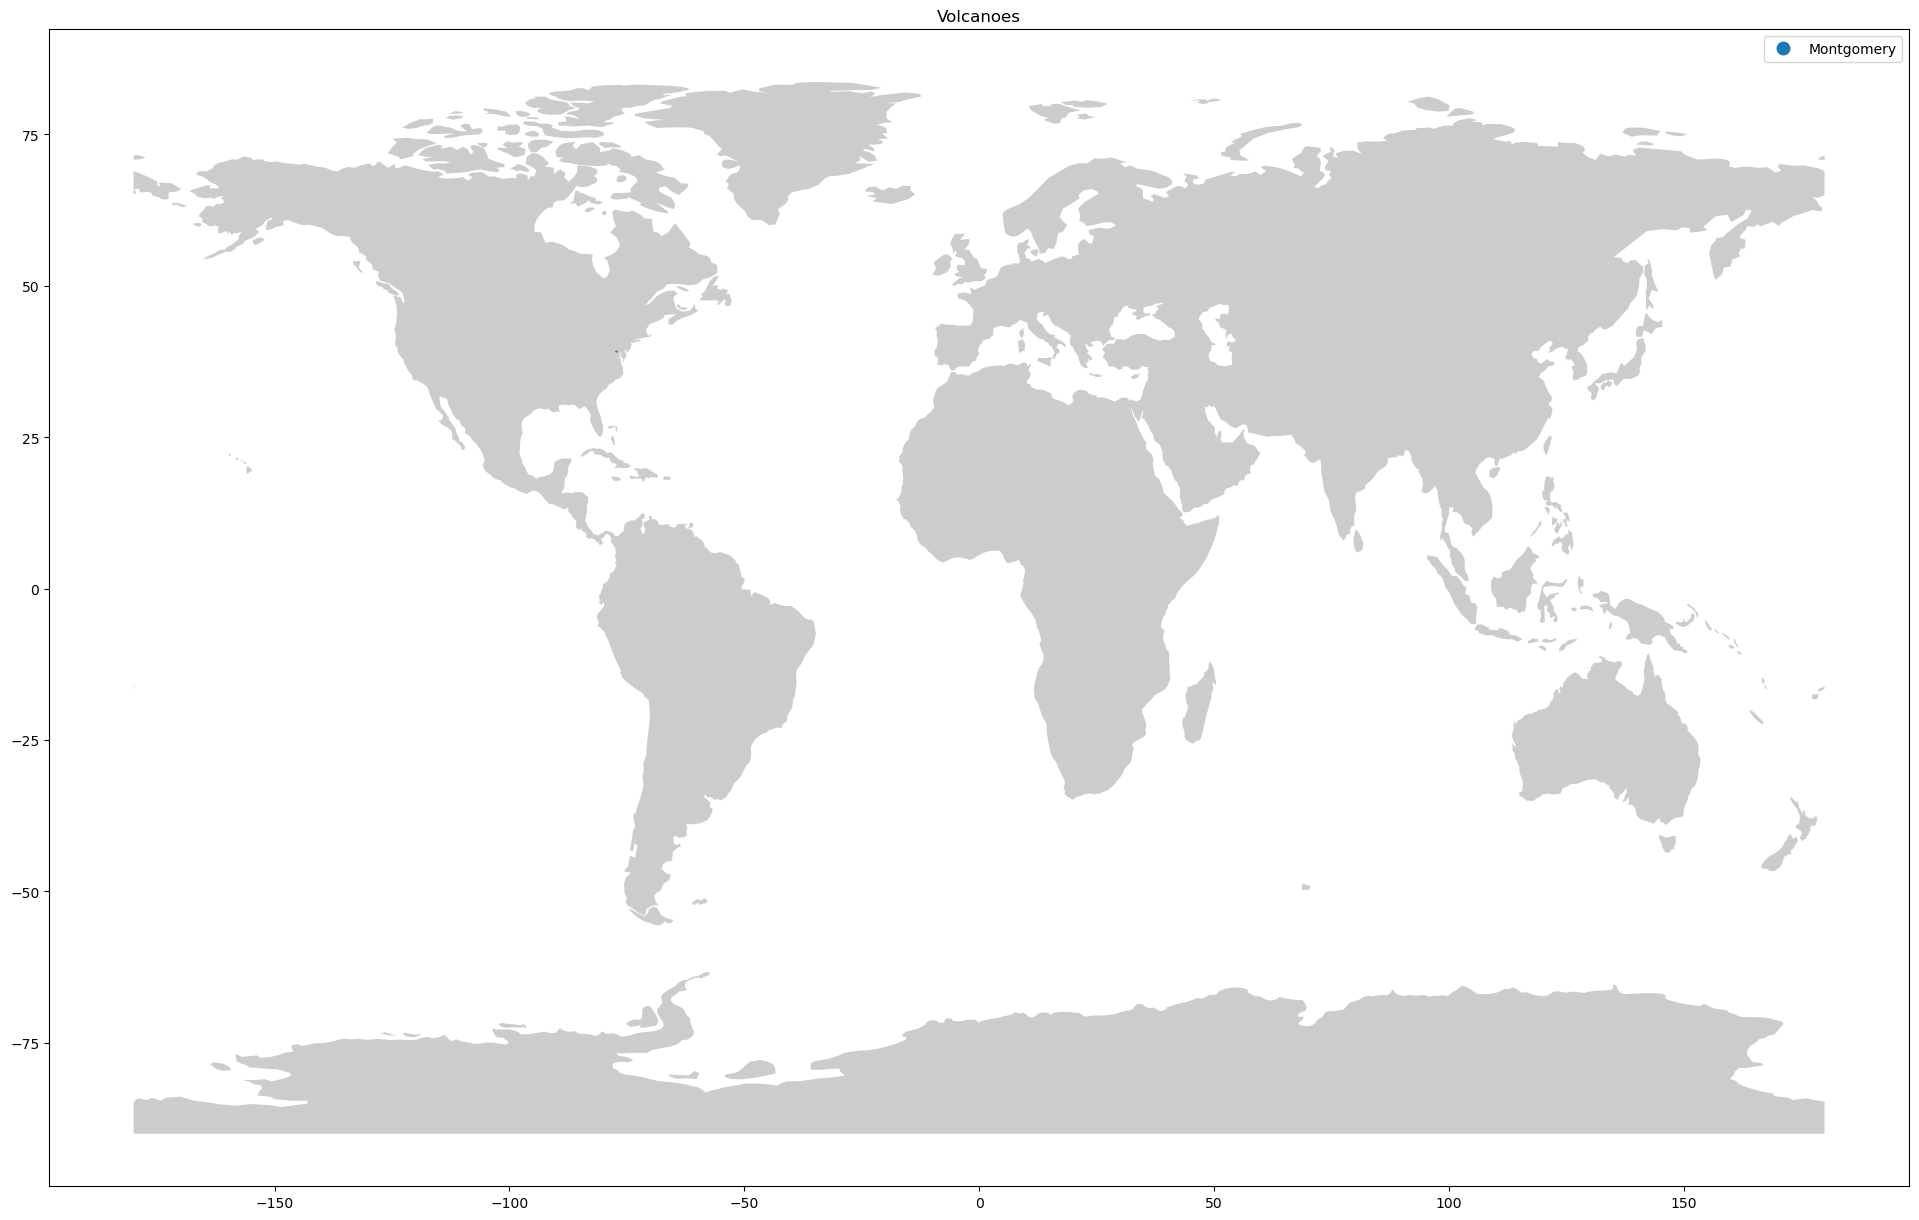

In [16]:
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
county_gdf.plot(column="County", ax=ax, legend=True)
plt.title("Volcanoes")

In [23]:
# Create a map centered on a specific location
m = folium.Map(location=[39.1364, -77.1715], zoom_start=12) 

# Add a marker to the map
folium.Marker(location=[39.1364, -77.1715], popup="New York City").add_to(m)
m

In [28]:
# This example uses heatmaps to visualize the density of volcanoes
# which is more in some parts of the world compared to others.



map = folium.Map(location=[15, 30], tiles="Cartodb dark_matter", zoom_start=2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in montgomery_gdf.loc['2020-03'].geometry]

heat_data
plugins.HeatMap(heat_data).add_to(map)
map